# Extracting Bacteria Colonies from Images with Connected Components

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipympl
import imageio.v3 as iio
import skimage.color
import skimage.filters
import skimage.measure

The function below finds the connected components with an optional parameter min_area which removes objects that are below a certain pixel area.

In [22]:
def connected_components(filename, sigma=1.0, t=0.5, connectivity=2, min_area = 0):
    # load the image
    image = iio.imread(filename)
    # convert the image to grayscale
    gray_image = skimage.color.rgb2gray(image)
    # denoise the image with a Gaussian filter
    blurred_image = skimage.filters.gaussian(gray_image, sigma=sigma)
    # mask the image according to threshold
    binary_mask = blurred_image < t
    # perform connected component analysis
    labeled_image, count = skimage.measure.label(binary_mask,
                                                 connectivity=connectivity, return_num=True)
    # get the pixel area of each shape
    object_features = skimage.measure.regionprops(labeled_image)
    object_areas = np.array([objf["area"] for objf in object_features])
    object_labels = np.array([objf["label"] for objf in object_features])
    # keep large objects
    large_objects = object_labels[object_areas > min_area]
    count = len(large_objects)
    # remove small objects from the image
    mask = labeled_image == large_objects[:, None, None]
    labeled_image[~np.any(mask, axis = 0)] = 0
    return labeled_image, object_areas, count

## Colonies-01

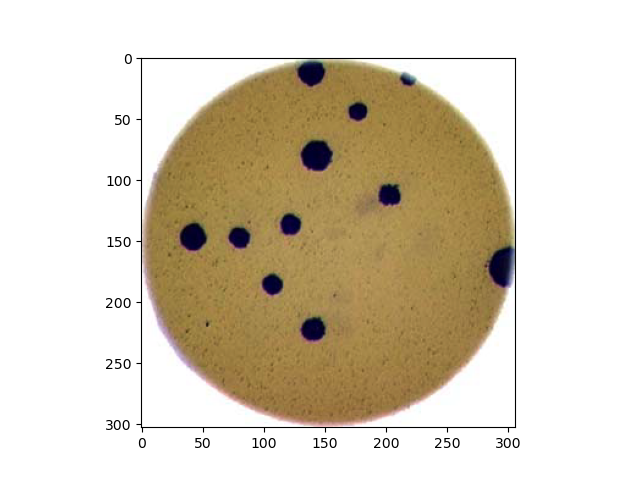

In [8]:
colonies01 = plt.imread('colonies-01.tif')
fig, ax = plt.subplots()
plt.imshow(colonies01)
plt.show()

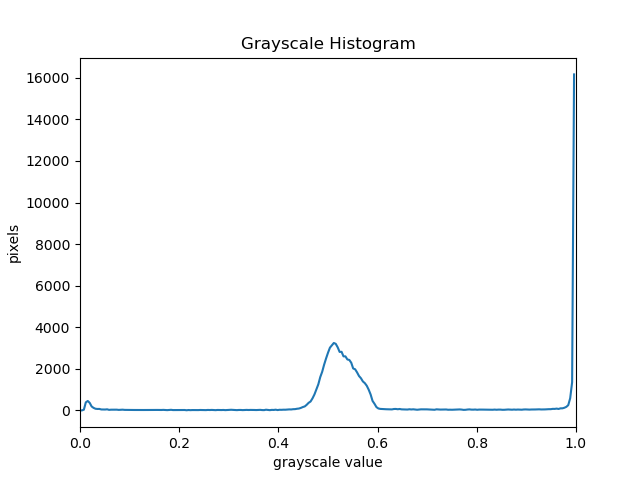

In [15]:
# convert to grayscale
gray_image = skimage.color.rgb2gray(colonies01)
# denoise the image with a Gaussian filter
blurred_image = skimage.filters.gaussian(gray_image, sigma=1)
histogram, bin_edges = np.histogram(blurred_image, bins=256, range=(0.0, 1.0))
fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 1.0)
plt.show()

Based on above, choose t to be 0.4

Found 11 colonies.
[427  72 253 597 329 293 489 305 598 278 388]


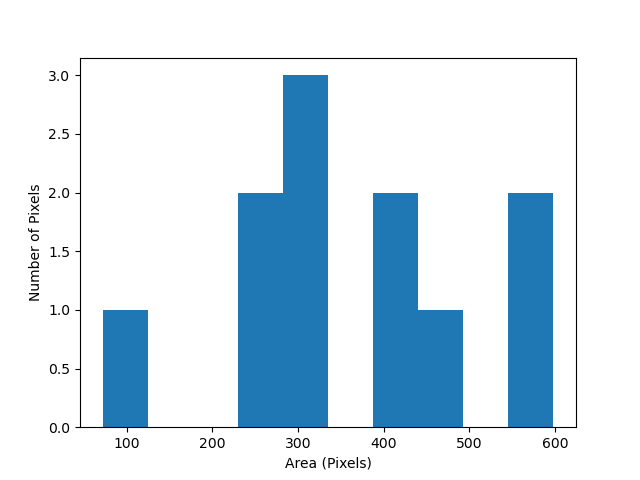

In [35]:
# compute object features and extract object areas
labeled_image, object_areas, count = connected_components(filename="colonies-01.tif", sigma=2.0, t=0.4, connectivity=2)
print('Found', count, 'colonies.')
print(object_areas)
fig, ax = plt.subplots()
plt.hist(object_areas)
plt.xlabel('Area (Pixels)')
plt.ylabel('Number of Pixels')
plt.show()

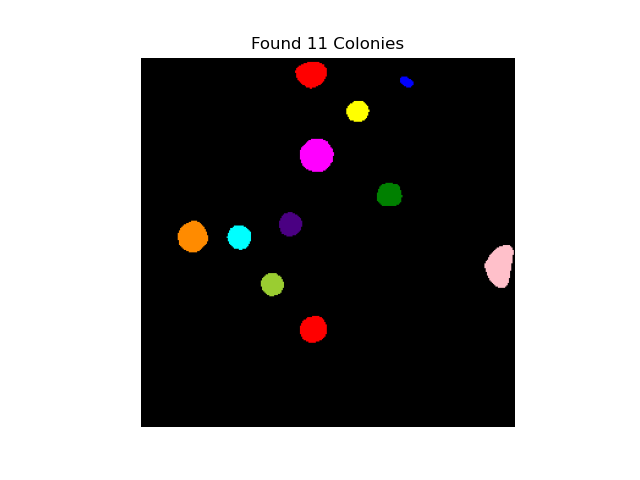

In [36]:
colored_label_image = skimage.color.label2rgb(labeled_image, bg_label=0)
fig, ax = plt.subplots()
plt.imshow(colored_label_image)
plt.title(f'Found {count} Colonies')
plt.axis("off");
plt.show()

For colonies-01, we did not need to specify a minimum area. Setting a threshold value of 0.4 with a sigma value of 2.0 was able to extract all the colonies from the original image.

## Colonies-02

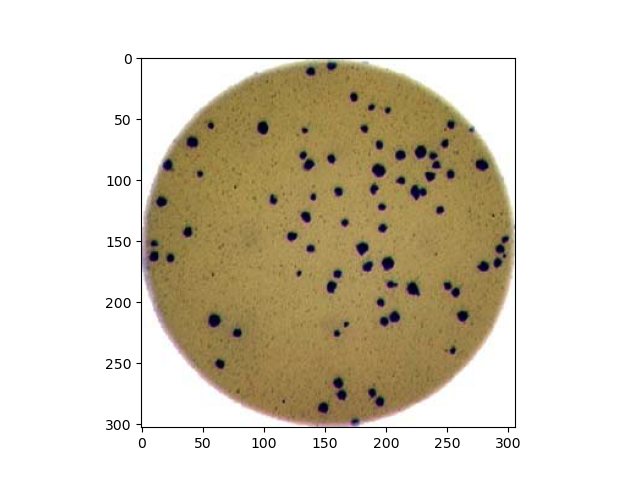

In [39]:
colonies02 = plt.imread('colonies-02.tif')
fig, ax = plt.subplots()
plt.imshow(colonies02)
plt.show()

This image has a lot more colonies of bacteria than the previous. We will also try a threshold value of 0.4 for this image. Since the colonies are smaller for this image, we will decrease sigma to 0.5 and connectivity to 1.

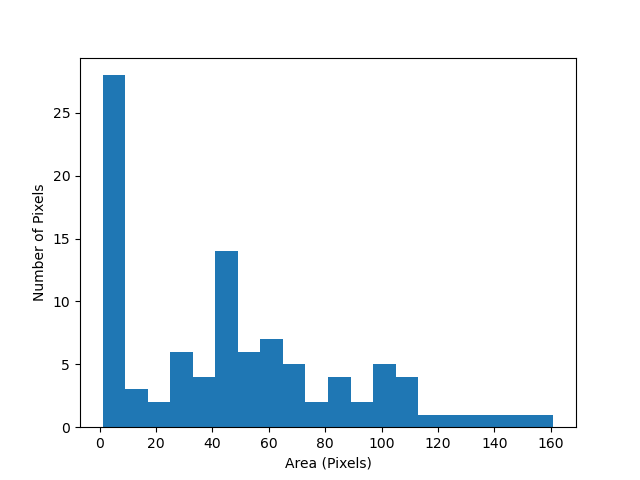

In [78]:
# compute object features and extract object areas
labeled_image, object_areas, count = connected_components(filename="colonies-02.tif", sigma=0.5, t=0.4, connectivity=1)
fig, ax = plt.subplots()
plt.hist(object_areas, bins=20)
plt.xlabel('Area (Pixels)')
plt.ylabel('Number of Pixels')
plt.show()

There are some shapes that were counted that are not bacteria colonies. Let's see what was extracted and define a minimimum area threshold to remove smaller objects.

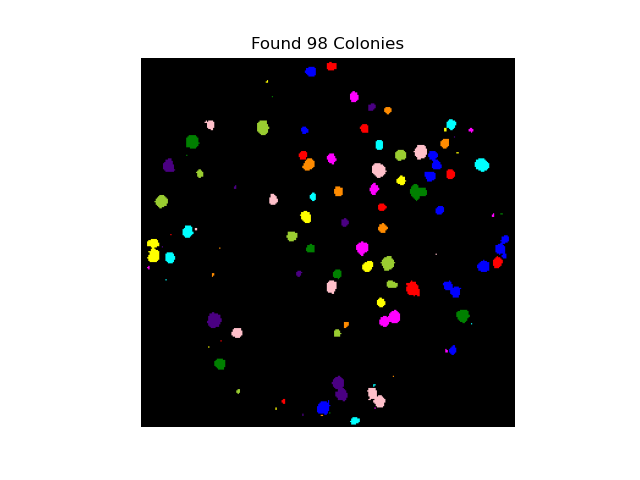

In [79]:
colored_label_image = skimage.color.label2rgb(labeled_image, bg_label=0)
fig, ax = plt.subplots()
plt.imshow(colored_label_image)
plt.title(f'Found {count} Colonies')
plt.axis("off");
plt.show()

In [80]:
print('Found', count, 'colonies.')
print(np.sort(object_areas))

Found 98 colonies.
[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   2   2   2
   2   3   3   4   4   5   5   5   5   6   9  10  11  17  18  27  28  28
  29  29  30  33  34  34  36  41  41  41  41  42  43  44  44  44  45  45
  47  47  48  49  49  50  50  52  53  58  58  59  59  60  61  63  67  67
  68  70  72  74  76  81  83  85  88  93  95  97  98  99  99 100 106 106
 107 110 114 121 132 140 145 161]


There appears to be some smaller shapes that were detected. Based on the areas we see, let's extract the shapes that have an area greater than 10.

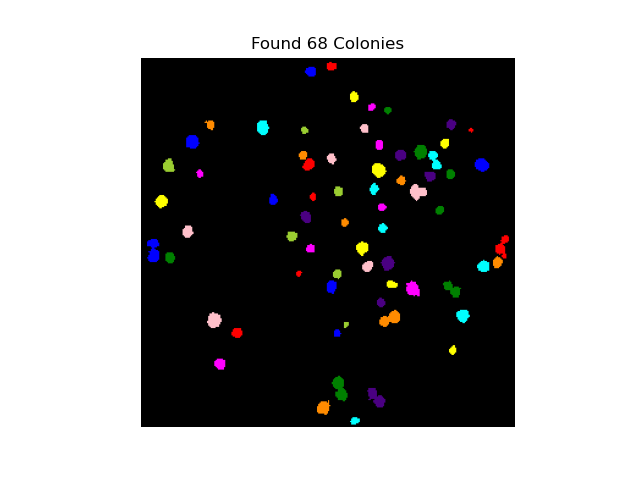

In [83]:
labeled_image, object_areas, count = connected_components(filename="colonies-02.tif", 
                                                          sigma=0.5, t=0.4, 
                                                          connectivity=1, min_area=10)
colored_label_image = skimage.color.label2rgb(labeled_image, bg_label=0)
fig, ax = plt.subplots()
plt.imshow(colored_label_image)
plt.title(f'Found {count} Colonies')
plt.axis("off");
plt.show()

By removing objects that were smaller than 10 pixels in area, we were able to extract the smaller bacteria colonies in the image without counting the noise in the background. Although we used connectivity 1 and reduced sigma to 0.5, we can still see some bacteria colonies that are closer together were counted as one group, so the count of colonies is slightly undervalued.

## Colonies-03

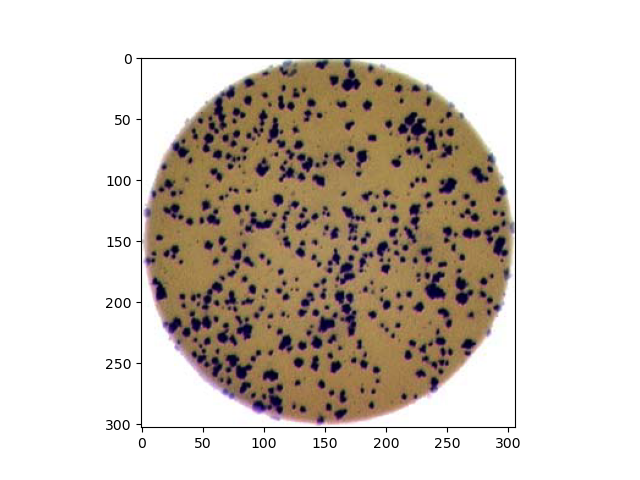

In [84]:
colonies03 = plt.imread('colonies-03.tif')
fig, ax = plt.subplots()
plt.imshow(colonies03)
plt.show()

This image has a lot of colonies that are vert small. We will also use a threshold value of 0.4 for this image. Since the colonies are small, we will decrease sigma to 0.5 and connectivity to 1 like we did for colonies-02.

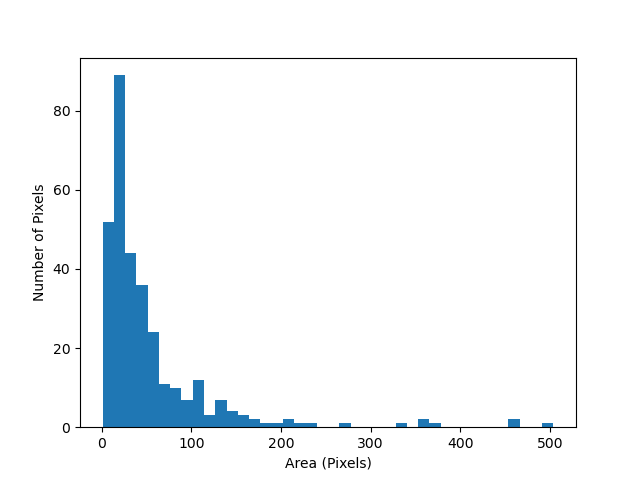

In [88]:
# compute object features and extract object areas
labeled_image, object_areas, count = connected_components(filename="colonies-03.tif", sigma=0.5, t=0.4, connectivity=1)
fig, ax = plt.subplots()
plt.hist(object_areas, bins=40)
plt.xlabel('Area (Pixels)')
plt.ylabel('Number of Pixels')
plt.show()

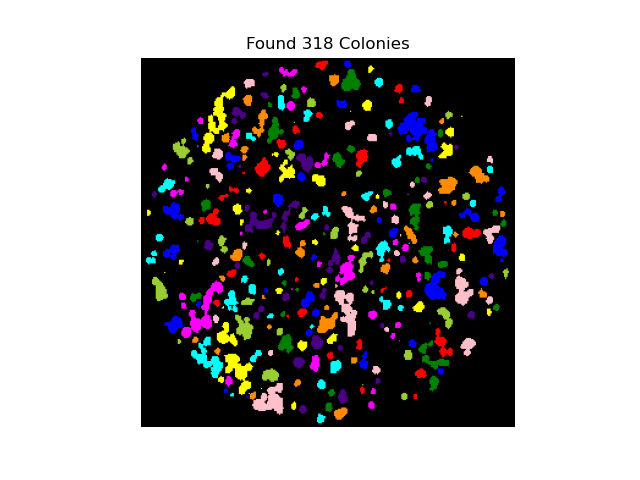

In [89]:
colored_label_image = skimage.color.label2rgb(labeled_image, bg_label=0)
fig, ax = plt.subplots()
plt.imshow(colored_label_image)
plt.title(f'Found {count} Colonies')
plt.axis("off");
plt.show()

In [90]:
print('Found', count, 'colonies.')
print(np.sort(object_areas))

Found 318 colonies.
[  1   1   1   1   1   1   1   1   1   1   2   2   2   2   2   2   3   4
   4   5   5   5   6   6   7   7   7   7   7   7   8   8   9   9  10  10
  10  10  10  10  10  11  11  11  12  12  12  13  13  13  13  13  14  14
  14  14  15  15  15  15  15  15  15  15  16  16  16  16  16  17  17  17
  17  17  17  17  17  17  18  18  18  18  18  18  18  18  18  19  19  19
  19  19  19  19  20  20  20  20  20  20  20  20  20  20  20  21  21  21
  21  22  22  22  22  22  22  23  23  23  23  23  24  24  24  24  24  24
  24  24  25  25  25  25  25  25  25  26  26  26  26  26  26  27  27  27
  27  27  27  27  27  27  28  28  28  29  29  29  29  29  29  30  30  30
  30  30  31  31  31  32  33  33  33  35  35  35  36  36  36  36  36  37
  37  37  38  38  38  39  39  39  39  40  40  40  40  40  41  42  43  44
  44  44  44  45  45  45  45  46  46  47  47  47  48  48  48  49  49  49
  49  50  50  50  51  52  52  53  53  53  54  54  54  54  55  56  56  57
  57  59  60  61  61  61  62  6

There appears to be some smaller objects that were detected in the background. Since the colonies are very small, we will define the minimum area to be 4.

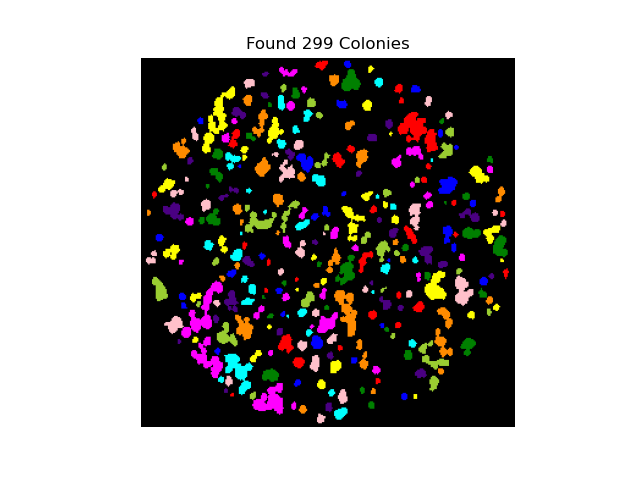

In [99]:
labeled_image, object_areas, count = connected_components(filename="colonies-03.tif", 
                                                          sigma=0.5, t=0.4, 
                                                          connectivity=1, min_area=4)
colored_label_image = skimage.color.label2rgb(labeled_image, bg_label=0)
fig, ax = plt.subplots()
plt.imshow(colored_label_image)
plt.title(f'Found {count} Colonies')
plt.axis("off");
plt.show()

By removing objects that were smaller than 4 pixels in area, we were able to extract the smaller bacteria colonies in the image without counting the noise in the background. Although we used connectivity 1 and reduced sigma to 0.5, we can still see some bacteria colonies that are closer together were counted as one group like in colonies-02. There appears to be some colonies of bacteria along the edge of the petri dish that were not detected due to the backlight which caused them to have a higher grayscale value than the other colonies. These factors lead to a slightly lower count of colonies than what is actually in the original image.